In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## 1. Data Exploration and Data Preprocessing

### Import Dataset

In [2]:
# QCM 3
qcm_3 = pd.read_csv("dataset/QCM3.csv", sep=";")
qcm_3["QCM"] = "QCM 3"

# QCM 6
qcm_6 = pd.read_csv("dataset/QCM6.csv", sep=";")
qcm_6["QCM"] = "QCM 6"

# QCM 7
qcm_7 = pd.read_csv("dataset/QCM7.csv", sep=";")
qcm_7["QCM"] = "QCM 7"

# QCM 10
qcm_10 = pd.read_csv("dataset/QCM10.csv", sep=";")
qcm_10["QCM"] = "QCM 10"

# QCM 12
qcm_12 = pd.read_csv("dataset/QCM12.csv", sep=";")
qcm_12["QCM"] = "QCM 12"

In [3]:
# Data Merging
qcm_data = pd.concat([qcm_3, qcm_6, qcm_7, qcm_10, qcm_12]).reset_index(drop=True)
ordered_cols = list(qcm_data.columns[-1:]) + list(qcm_data.columns[:-1])

qcm_data = qcm_data[ordered_cols]
qcm_data.head()

,QCM,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP,1-Octanol,1-Propanol,2-Butanol,2-propanol,1-isobutanol
0,QCM 3,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,1,0,0,0,0
1,QCM 3,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,1,0,0,0,0
2,QCM 3,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,1,0,0,0,0
3,QCM 3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,1,0,0,0,0
4,QCM 3,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,1,0,0,0,0


In [4]:
# Labels exploration
unique_labels = qcm_data.iloc[:,-5:].sum(axis=1).unique()
print(f"Unique labels: {', '.join(list(map(str, unique_labels)))}")

Unique labels: 1


The dataset's target labels are completely one-hot encoded. So, this is **multiclass classification problem**. We will encode them to be **label-encoded** (but not necessarily to be ordinal).

In [5]:
# Label encoded manually
labels = qcm_data.iloc[:,-5:] * np.array([1, 2, 3, 4, 5])
labels = labels.sum(axis=1)

labels_dict = {labels.unique()[i]:qcm_data.columns[-5+i] for i in range(len(labels.unique()))}
labels_dict

{1: '1-Octanol',
 2: '1-Propanol',
 3: '2-Butanol',
 4: '2-propanol',
 5: '1-isobutanol'}

In [6]:
# Preprocessed data
qcm_data.drop(qcm_data.columns[-5:], axis=1, inplace=True)
qcm_data["target"] = labels - 1

qcm_data.head()

,QCM,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP,target
0,QCM 3,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,0
1,QCM 3,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,0
2,QCM 3,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,0
3,QCM 3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,0
4,QCM 3,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,0


### Data Exploration (1)

In [7]:
# Check data types
qcm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QCM              125 non-null    object 
 1   0.799_0.201_MIP  125 non-null    float64
 2   0.799_0.201_NP   125 non-null    float64
 3   0.700_0.300_MIP  125 non-null    float64
 4   0.700_0.300_NP   125 non-null    float64
 5   0.600_0.400_MIP  125 non-null    float64
 6   0.600_0.400_NP   125 non-null    float64
 7   0.501_0.499_MIP  125 non-null    float64
 8   0.501_0.499_NP   125 non-null    float64
 9   0.400_0.600_MIP  125 non-null    float64
 10  0.400_0.600_NP   125 non-null    float64
 11  target           125 non-null    int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 11.8+ KB


In [8]:
# Check missing values
qcm_data.isnull().sum()

QCM                0
0.799_0.201_MIP    0
0.799_0.201_NP     0
0.700_0.300_MIP    0
0.700_0.300_NP     0
0.600_0.400_MIP    0
0.600_0.400_NP     0
0.501_0.499_MIP    0
0.501_0.499_NP     0
0.400_0.600_MIP    0
0.400_0.600_NP     0
target             0
dtype: int64

In [9]:
# Statistic summary
qcm_data.describe()

,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP,target
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,-52.384480,-51.529200,-82.660160,-78.155200,-117.079120,-107.839040,-151.437360,-138.120160,-190.693680,-173.198880,2.000000
std,26.613388,24.374974,42.272666,36.560875,62.101935,52.594443,82.641805,70.392947,108.159961,92.772823,1.419905
min,-98.990000,-102.020000,-174.990000,-158.710000,-261.380000,-224.800000,-341.090000,-289.880000,-447.740000,-381.940000,0.000000
25%,-69.990000,-66.490000,-110.460000,-105.210000,-157.610000,-144.980000,-210.780000,-189.320000,-263.800000,-250.300000,1.000000
50%,-58.410000,-55.730000,-91.650000,-82.390000,-118.700000,-105.510000,-156.310000,-126.300000,-192.030000,-157.010000,2.000000
75%,-28.790000,-35.170000,-43.820000,-50.840000,-58.240000,-68.000000,-75.410000,-77.510000,-93.950000,-91.330000,3.000000
max,-9.400000,-7.950000,-14.430000,-17.280000,-24.640000,-27.350000,-35.280000,-39.910000,-40.630000,-49.870000,4.000000


1. The dataset has **right data types**.
2. There is **no missing values**.
3. All numerical features are **negative**.

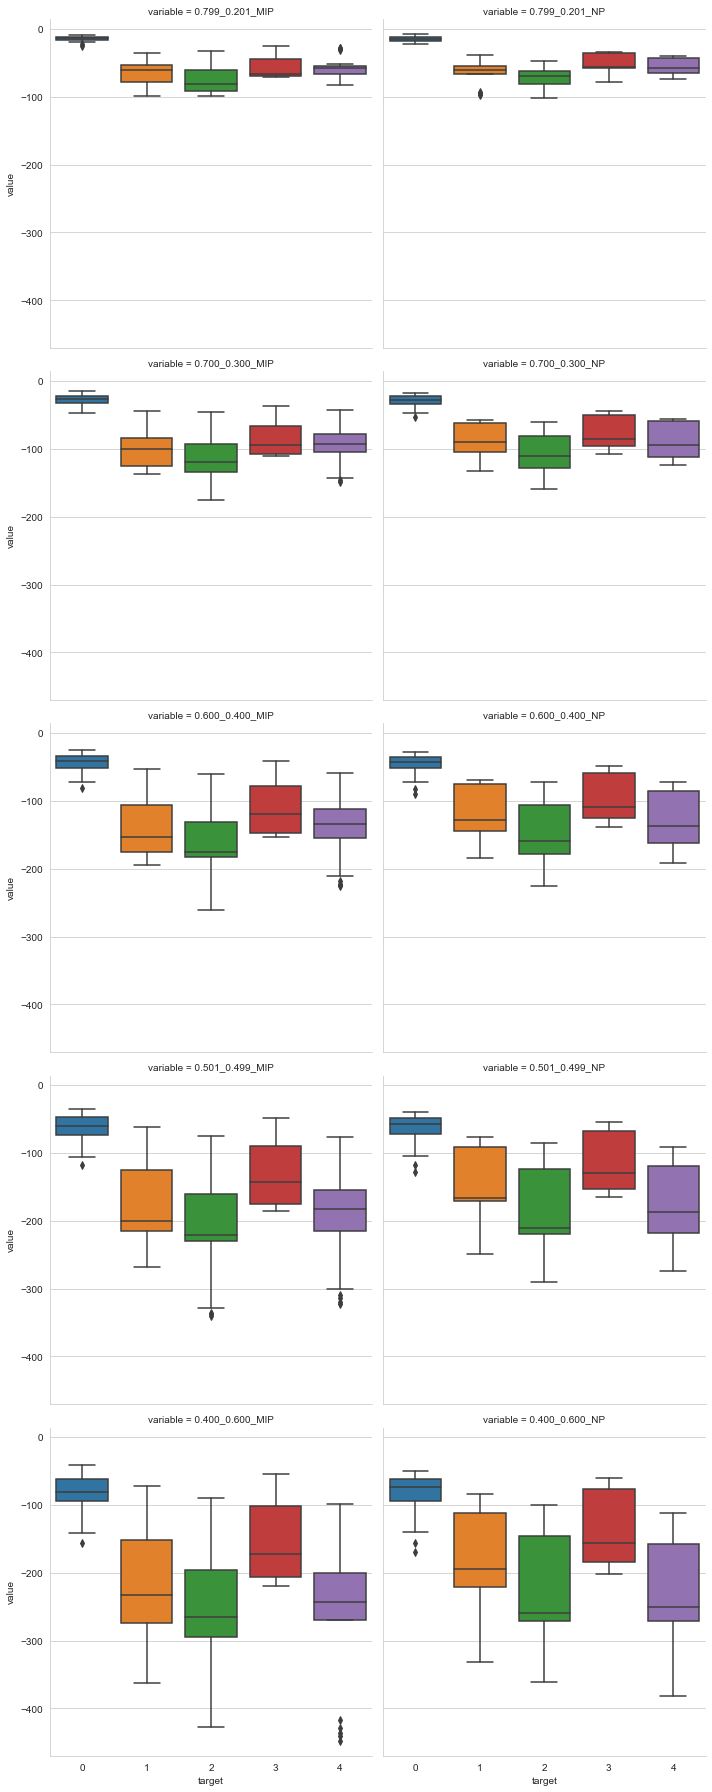

In [10]:
# Check Outliers
qcm_df = pd.melt(qcm_data, qcm_data.columns[-1], qcm_data.columns[1:-1])

sns.catplot(
    data=qcm_df, x='target', y='value',
    col='variable', kind='box', col_wrap=2
)

The outliers seem not to be significant.

In [11]:
# Check distribution of target labels
qcm_data['target'].value_counts()

0    25
1    25
2    25
3    25
4    25
Name: target, dtype: int64

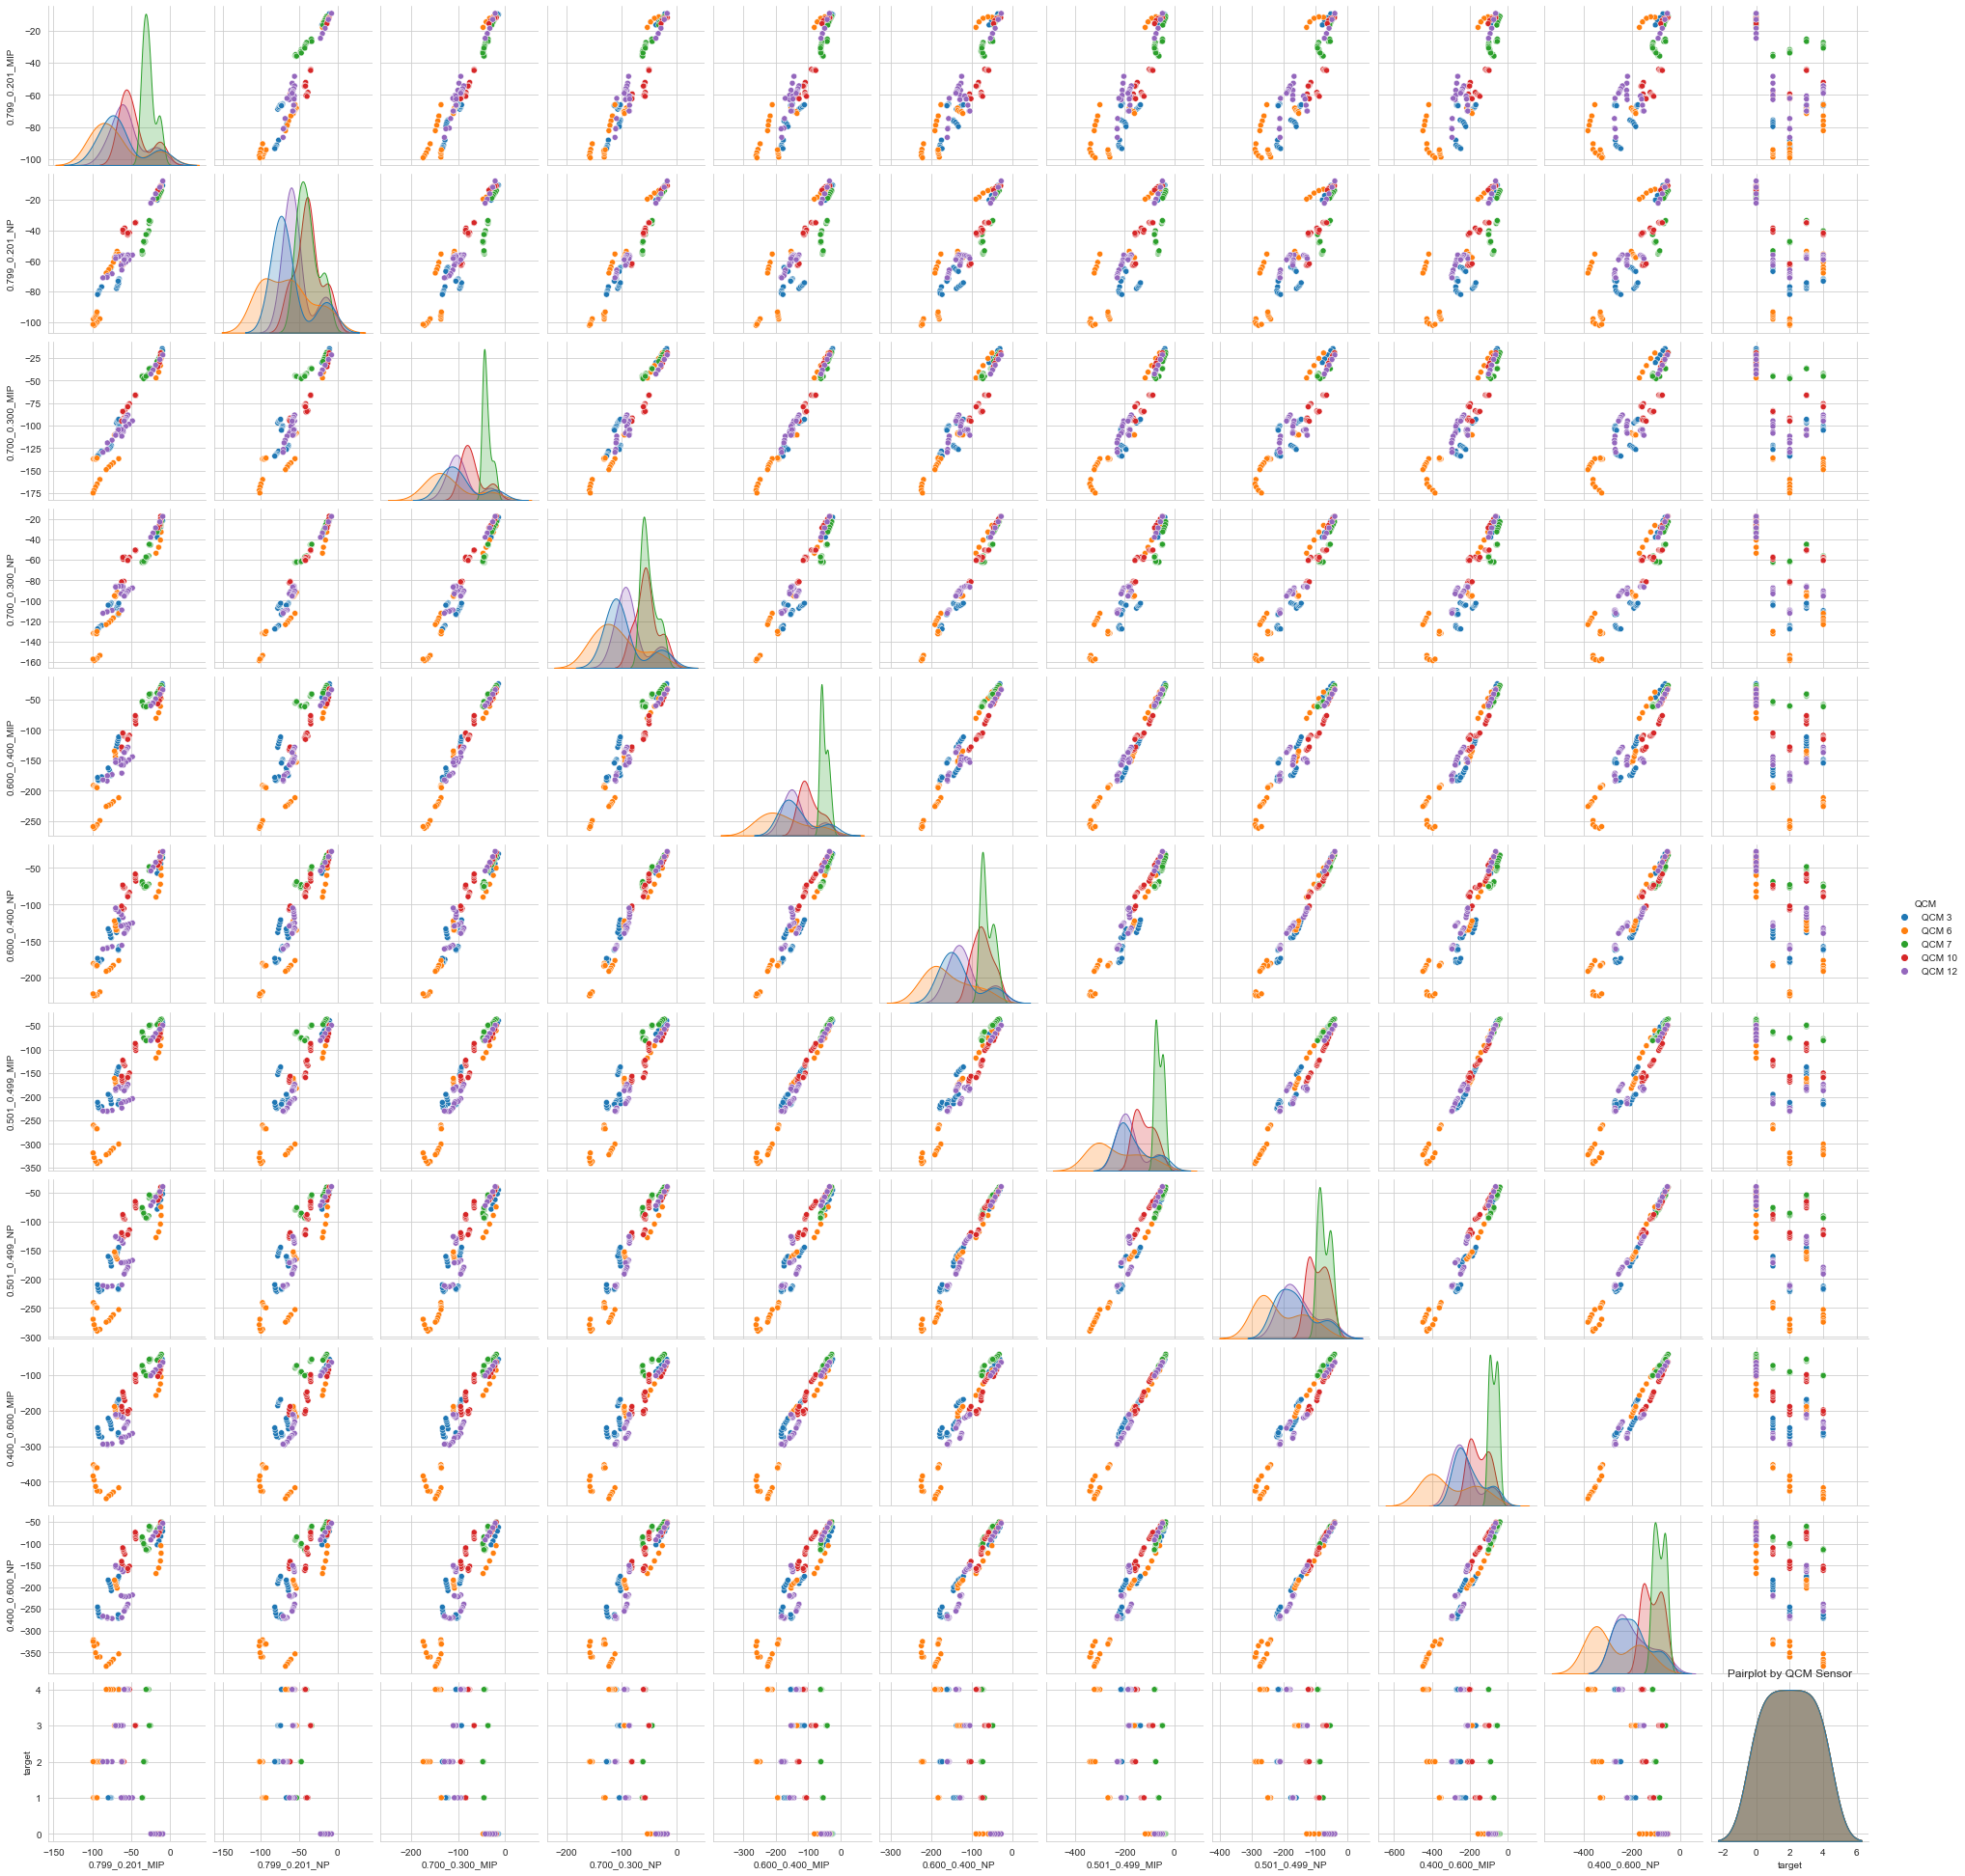

In [12]:
# Check correlation and distribution of each feature
sns.pairplot(qcm_data.drop_duplicates(), hue="QCM")
plt.title("Pairplot by QCM Sensor")
plt.show()

Most of **QCM 7** sensor's values are high.

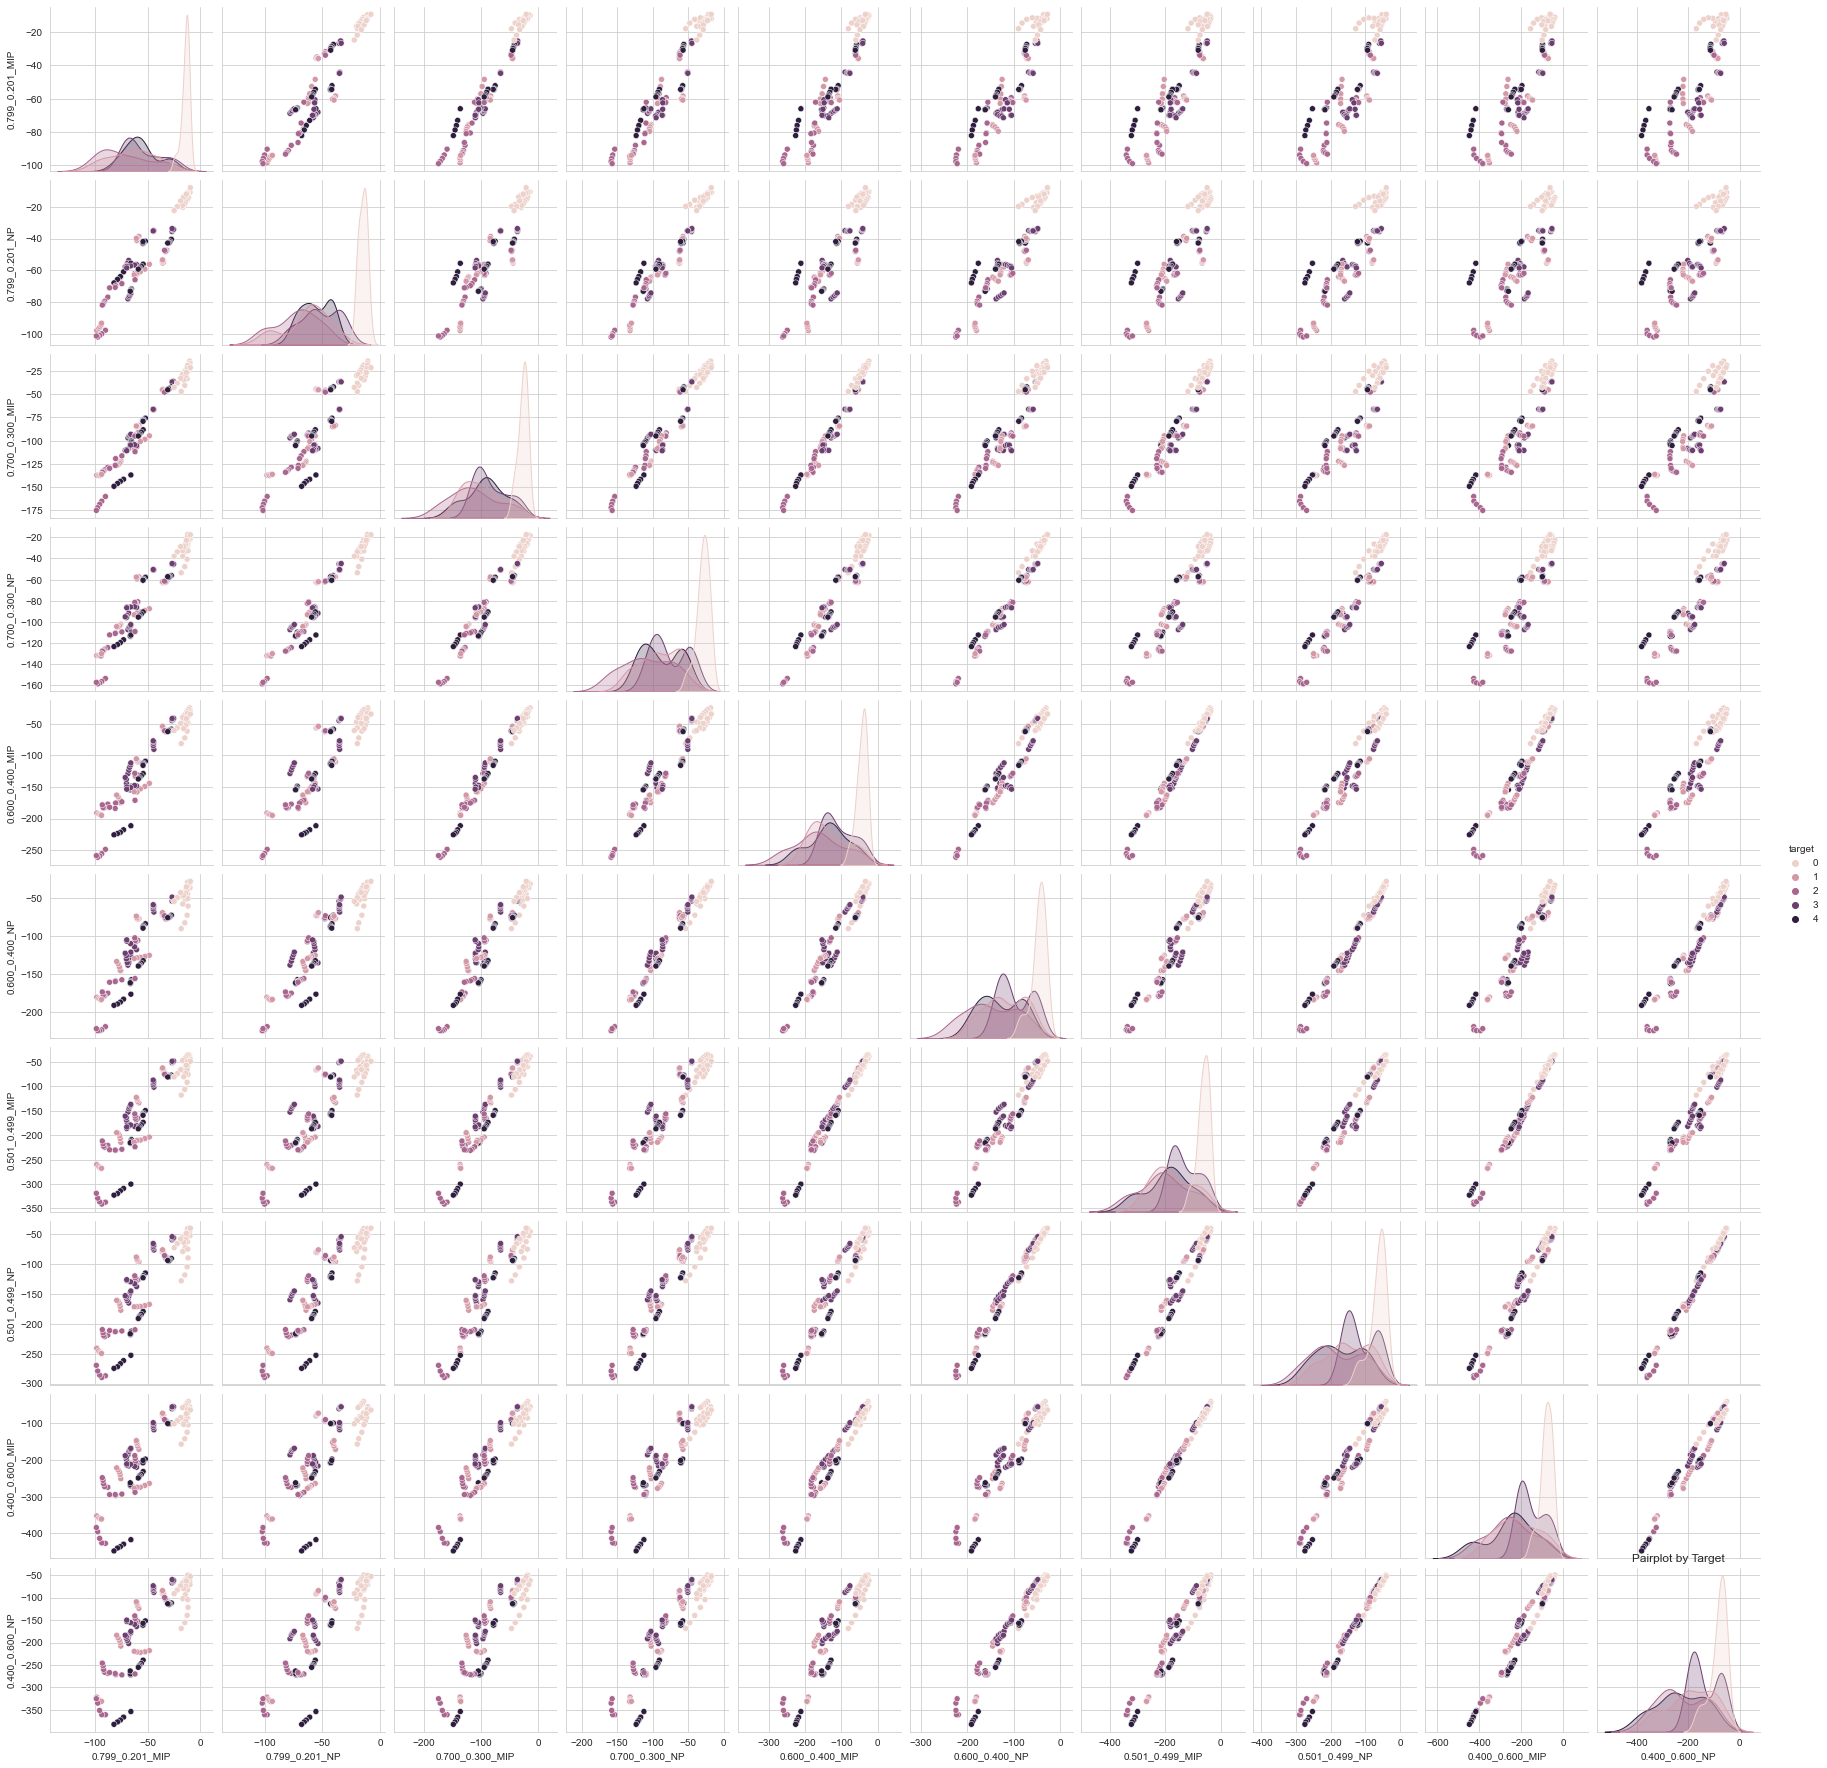

In [13]:
# Check correlation and distribution of each feature
sns.pairplot(qcm_data.drop_duplicates(), hue="target")
plt.title("Pairplot by Target")
plt.show()

Most of **1-octanol** molecules have **high values of MIP and NP**. Also, all of the features are **highly correlated** with other features.

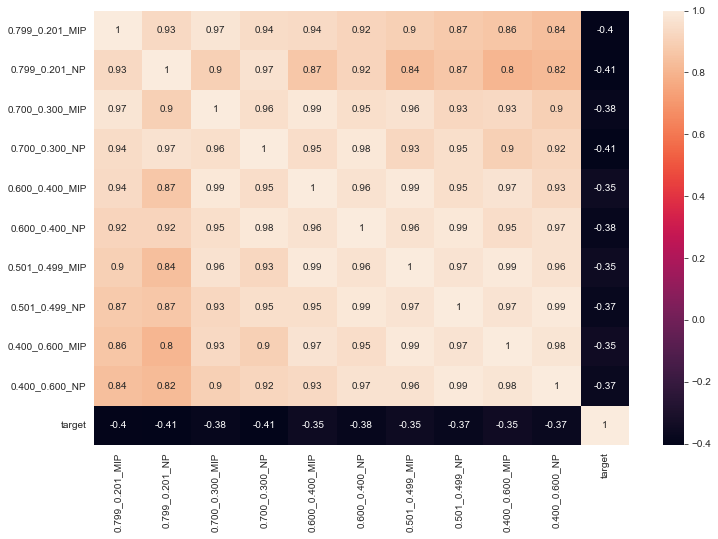

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(qcm_data.corr(), annot=True)
plt.show()

We encounter another problem, **multicollinearity**.

## Model Building

### Feature Engineering

In [15]:
qcm_data.head()

,QCM,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP,target
0,QCM 3,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,0
1,QCM 3,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,0
2,QCM 3,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,0
3,QCM 3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,0
4,QCM 3,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,0


In [16]:
# Preprocessed data
preprocessed_data = qcm_data.copy()

preprocessed_data['0.799_0.201_Ratio'] = preprocessed_data["0.799_0.201_MIP"] / preprocessed_data["0.799_0.201_NP"]
preprocessed_data['0.700_0.300_Ratio'] = preprocessed_data["0.700_0.300_MIP"] / preprocessed_data["0.700_0.300_NP"]
preprocessed_data['0.600_0.400_Ratio'] = preprocessed_data["0.600_0.400_MIP"] / preprocessed_data["0.600_0.400_NP"]
preprocessed_data['0.501_0.499_Ratio'] = preprocessed_data["0.501_0.499_MIP"] / preprocessed_data["0.501_0.499_NP"]
preprocessed_data['0.400_0.600_Ratio'] = preprocessed_data["0.400_0.600_MIP"] / preprocessed_data["0.400_0.600_NP"]

preprocessed_data.head()

,QCM,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP,target,0.799_0.201_Ratio,0.700_0.300_Ratio,0.600_0.400_Ratio,0.501_0.499_Ratio,0.400_0.600_Ratio
0,QCM 3,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,0,0.947269,0.788094,0.806283,0.847116,0.881342
1,QCM 3,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,0,0.892265,0.769195,0.794586,0.832539,0.868809
2,QCM 3,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,0,0.845238,0.771490,0.800865,0.832773,0.866065
3,QCM 3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,0,0.816198,0.776679,0.805344,0.837736,0.868699
4,QCM 3,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,0,0.814251,0.792019,0.820911,0.850177,0.876863


In [17]:
X = preprocessed_data.drop("target", axis=1)
Y = preprocessed_data["target"]

In [18]:
X.head()

,QCM,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP,0.799_0.201_Ratio,0.700_0.300_Ratio,0.600_0.400_Ratio,0.501_0.499_Ratio,0.400_0.600_Ratio
0,QCM 3,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,0.947269,0.788094,0.806283,0.847116,0.881342
1,QCM 3,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,0.892265,0.769195,0.794586,0.832539,0.868809
2,QCM 3,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,0.845238,0.771490,0.800865,0.832773,0.866065
3,QCM 3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,0.816198,0.776679,0.805344,0.837736,0.868699
4,QCM 3,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,0.814251,0.792019,0.820911,0.850177,0.876863


#### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Model Building

In [20]:
X_train.head()

,QCM,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP,0.799_0.201_Ratio,0.700_0.300_Ratio,0.600_0.400_Ratio,0.501_0.499_Ratio,0.400_0.600_Ratio
85,QCM 10,-59.41,-61.86,-91.65,-81.02,-131.05,-105.51,-165.68,-126.30,-207.16,-153.44,0.960394,1.131202,1.242062,1.311797,1.350104
30,QCM 6,-98.63,-97.92,-137.15,-131.93,-191.17,-180.52,-260.06,-240.69,-352.22,-321.20,1.007251,1.039566,1.058996,1.080477,1.096575
94,QCM 10,-44.80,-35.17,-66.20,-50.42,-76.80,-58.26,-87.09,-65.55,-98.14,-73.89,1.273813,1.312971,1.318229,1.328604,1.328191
55,QCM 7,-35.68,-55.46,-44.41,-62.35,-56.36,-72.43,-66.26,-80.33,-79.56,-91.76,0.643347,0.712269,0.778131,0.824848,0.867044
9,QCM 3,-79.62,-66.85,-126.61,-104.38,-162.73,-133.26,-194.87,-160.68,-221.33,-183.81,1.191025,1.212972,1.221147,1.212783,1.204124


In [21]:
# Only Numerical Columns (Standardize)
from sklearn.preprocessing import StandardScaler

scaled_X_train = X_train.copy()
scaler = StandardScaler()

num_X_train = X_train.iloc[:, 1:].copy()
scaled_X_train.iloc[:, 1:] = scaler.fit_transform(num_X_train)

scaled_X_train.head()

,QCM,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP,0.799_0.201_Ratio,0.700_0.300_Ratio,0.600_0.400_Ratio,0.501_0.499_Ratio,0.400_0.600_Ratio
85,QCM 10,-0.275759,-0.422384,-0.216258,-0.088326,-0.224223,0.028830,-0.173412,0.150121,-0.155760,0.195116,-0.196319,0.448362,0.849359,1.187846,1.440962
30,QCM 6,-1.784214,-1.937974,-1.297450,-1.509161,-1.188203,-1.416395,-1.311280,-1.492230,-1.496106,-1.629135,0.021714,-0.001347,-0.057443,-0.018974,0.037203
94,QCM 10,0.286161,0.699388,0.388497,0.765682,0.645635,0.939200,0.774088,1.022338,0.851579,1.060157,1.262084,1.340406,1.226642,1.275529,1.319628
55,QCM 7,0.636929,-0.153394,0.906281,0.432730,0.973375,0.666185,1.025220,0.810134,1.023257,0.865835,-1.671610,-1.607581,-1.448685,-1.352616,-1.233681
9,QCM 3,-1.053064,-0.632112,-1.046993,-0.740275,-0.732188,-0.505832,-0.525334,-0.343489,-0.286690,-0.135132,0.876852,0.849653,0.745755,0.671280,0.632686


In [22]:
# Only Categorical Column (One Hot Encoding)
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore")
enc.fit(scaled_X_train[["QCM"]])

# One Hot Encoded in DataFrame
cat_cols = enc.get_feature_names_out()
cat_data = enc.transform(scaled_X_train[["QCM"]]).toarray()
cat_df = pd.DataFrame(data=cat_data, columns=cat_cols)
cat_df.index = scaled_X_train.index

cat_df.head()

,QCM_QCM 10,QCM_QCM 12,QCM_QCM 3,QCM_QCM 6,QCM_QCM 7
85,1.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,1.0,0.0
94,1.0,0.0,0.0,0.0,0.0
55,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0


In [23]:
new_X_train = pd.concat([cat_df, scaled_X_train.iloc[:, 1:]], axis=1)
new_X_train.head()

,QCM_QCM 10,QCM_QCM 12,QCM_QCM 3,QCM_QCM 6,QCM_QCM 7,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP,0.799_0.201_Ratio,0.700_0.300_Ratio,0.600_0.400_Ratio,0.501_0.499_Ratio,0.400_0.600_Ratio
85,1.0,0.0,0.0,0.0,0.0,-0.275759,-0.422384,-0.216258,-0.088326,-0.224223,0.028830,-0.173412,0.150121,-0.155760,0.195116,-0.196319,0.448362,0.849359,1.187846,1.440962
30,0.0,0.0,0.0,1.0,0.0,-1.784214,-1.937974,-1.297450,-1.509161,-1.188203,-1.416395,-1.311280,-1.492230,-1.496106,-1.629135,0.021714,-0.001347,-0.057443,-0.018974,0.037203
94,1.0,0.0,0.0,0.0,0.0,0.286161,0.699388,0.388497,0.765682,0.645635,0.939200,0.774088,1.022338,0.851579,1.060157,1.262084,1.340406,1.226642,1.275529,1.319628
55,0.0,0.0,0.0,0.0,1.0,0.636929,-0.153394,0.906281,0.432730,0.973375,0.666185,1.025220,0.810134,1.023257,0.865835,-1.671610,-1.607581,-1.448685,-1.352616,-1.233681
9,0.0,0.0,1.0,0.0,0.0,-1.053064,-0.632112,-1.046993,-0.740275,-0.732188,-0.505832,-0.525334,-0.343489,-0.286690,-0.135132,0.876852,0.849653,0.745755,0.671280,0.632686


## 2. Model Building (Not ANN)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = [("Logistic Regression", LogisticRegression(multi_class="multinomial", solver="lbfgs")),
          ("Support Vector Machine", SVC()),
          ("Decision Tree", DecisionTreeClassifier()),
          ("Random Forest", RandomForestClassifier()),
          ("XGBoost", XGBClassifier(objective="multi:softmax"))
         ]

In [25]:
from sklearn.model_selection import cross_val_score, KFold

fold_5 = KFold(5, shuffle=True)
data = []

for name, model in models:
    scores = cross_val_score(model, new_X_train, Y_train, cv=fold_5, scoring="accuracy")
    score = scores.mean()
    
    data.append((name, score))
    
model_summary = pd.DataFrame(data=data, columns=["model", "accuracy"])
model_summary

,model,accuracy
0,Logistic Regression,0.724837
1,Support Vector Machine,0.356863
2,Decision Tree,0.805229
3,Random Forest,0.976471
4,XGBoost,0.839869


### Model Testing

In [26]:
def preprocessed_data(X_test):
    scaled_X_test = X_test.copy()

    # Numerical Columns
    num_X_test = X_test.iloc[:, 1:].copy()
    scaled_X_test.iloc[:, 1:] = scaler.transform(num_X_test)

    # Categorical Columns
    cat_cols = enc.get_feature_names_out()
    cat_data = enc.transform(scaled_X_test[["QCM"]]).toarray()
    cat_df = pd.DataFrame(data=cat_data, columns=cat_cols)
    cat_df.index = scaled_X_test.index

    # Result
    new_X_test = pd.concat([cat_df, scaled_X_test.iloc[:, 1:]], axis=1)

    return new_X_test

In [27]:
# Preprocessed the test dataset
new_X_test = preprocessed_data(X_test)
new_X_test.head()

,QCM_QCM 10,QCM_QCM 12,QCM_QCM 3,QCM_QCM 6,QCM_QCM 7,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP,0.799_0.201_Ratio,0.700_0.300_Ratio,0.600_0.400_Ratio,0.501_0.499_Ratio,0.400_0.600_Ratio
18,0.0,0.0,1.0,0.0,0.0,-0.543835,-0.973393,-0.266159,-0.720181,0.033768,-0.331850,0.146079,-0.150237,0.182792,-0.079565,-0.545187,-0.664691,-0.719297,-0.723746,-0.750973
42,0.0,0.0,0.0,1.0,0.0,-0.694988,-0.218540,-0.661566,-0.491050,-0.435555,-0.441095,-0.211027,-0.298693,-0.075280,-0.210273,1.073533,0.572620,0.196763,-0.066653,-0.273109
36,0.0,0.0,0.0,1.0,0.0,-1.598061,-2.024134,-1.958759,-2.192368,-2.221129,-2.245651,-2.288197,-2.198474,-2.178291,-2.057142,-0.299681,0.073373,0.360012,0.482818,0.508163
76,1.0,0.0,0.0,0.0,0.0,1.541925,1.701375,1.430957,1.616062,1.238581,1.413556,1.138066,1.291971,1.080914,1.222508,0.324747,0.389943,0.560315,0.691150,0.851011
53,0.0,0.0,0.0,0.0,1.0,1.430387,1.421878,1.333768,1.317438,1.290853,1.233216,1.295883,1.206401,1.260446,1.163896,-0.770308,-0.872815,-1.091535,-1.321372,-1.397534


Since the Random Forest model performs very good **(96% accuracy)**, then we **won't use Hyperparameter Tuning** by GridSearchCV or RandomizedSearchCV.

In [28]:
# Compare the predictions and actuals
rf = RandomForestClassifier()
rf.fit(new_X_train, Y_train)

predictions = rf.predict(new_X_test)

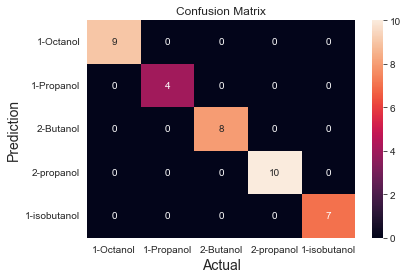

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(Y_test, predictions)

sns.heatmap(cm, annot=True, fmt="g", xticklabels=labels_dict.values(), yticklabels=labels_dict.values())
plt.ylabel("Prediction", fontsize=14)
plt.xlabel("Actual", fontsize=14)
plt.title("Confusion Matrix")
plt.show()

In [30]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         7

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [31]:
# Feature Importance
data = [(new_X_test.columns[i], rf.feature_importances_[i]) for i in range(20)]
feat_df = pd.DataFrame(data=data, columns=["Feature", "Importance"])

feat_df.sort_values(by="Importance", ascending=False)

,Feature,Importance
6,0.799_0.201_NP,0.121056
5,0.799_0.201_MIP,0.117965
8,0.700_0.300_NP,0.100523
10,0.600_0.400_NP,0.071333
12,0.501_0.499_NP,0.064614
7,0.700_0.300_MIP,0.057011
15,0.799_0.201_Ratio,0.056196
16,0.700_0.300_Ratio,0.054973
18,0.501_0.499_Ratio,0.053763
14,0.400_0.600_NP,0.051493


It seems that knowing **which QCM and Ratio of MIP and NP** that is used **won't give any significant predictions**.

### Conclusion

Looking at all the problems contained at this dataset, I hypothesize that **we need non-linear models**, like Decision Tree and Random Forest. **To be more concise, I also use standardization** which most of cases, it can give the best performance on model. **However, it seems that my previous hypothesis is right**, as **Logistic Regression and Support Vector Machine don't give good performance**. Therefore, I use **Random Forest to be my chosen model**, since its performance is very good.

**Surprisingly, Random Forest algorithm give 100% accuracy, 100% precision, and 100% recall on test dataset**.

## 3. Model Building (ANN)

In [32]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [33]:
# Building a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(20,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

model.compile(optimizer=Adam(learning_rate=1e-2), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

# Model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 3,589
Trainable params: 3,589
Non-trainable params: 0
_________________________________________________________________


In [34]:
# One-hot encoded the targets
Y_train_onehot = tf.keras.utils.to_categorical(Y_train, 5)
Y_test_onehot = tf.keras.utils.to_categorical(Y_test, 5)

In [35]:
# Model Training
model.fit(new_X_train, 
          Y_train_onehot, 
          validation_data=(new_X_test, Y_test_onehot), 
          epochs=20, 
          batch_size=16, 
          validation_split=0.2)

Epoch 1/20
6/6 [==============================] - 1s 116ms/step - loss: 1.5331 - accuracy: 0.3563 - val_loss: 1.2605 - val_accuracy: 0.5263
Epoch 2/20
6/6 [==============================] - 0s 11ms/step - loss: 1.2091 - accuracy: 0.5747 - val_loss: 1.0499 - val_accuracy: 0.5789
Epoch 3/20
6/6 [==============================] - 0s 10ms/step - loss: 1.0286 - accuracy: 0.6092 - val_loss: 0.9108 - val_accuracy: 0.6053
Epoch 4/20
6/6 [==============================] - 0s 10ms/step - loss: 0.8372 - accuracy: 0.7586 - val_loss: 0.7699 - val_accuracy: 0.7105
Epoch 5/20
6/6 [==============================] - 0s 9ms/step - loss: 0.6952 - accuracy: 0.7701 - val_loss: 0.6340 - val_accuracy: 0.8158
Epoch 6/20
6/6 [==============================] - 0s 10ms/step - loss: 0.5742 - accuracy: 0.8391 - val_loss: 0.6049 - val_accuracy: 0.7895
Epoch 7/20
6/6 [==============================] - 0s 9ms/step - loss: 0.4855 - accuracy: 0.8506 - val_loss: 0.4890 - val_accuracy: 0.8158
Epoch 8/20
6/6 [============

### ANN Model Evaluation

2/2 [==============================] - 0s 0s/step


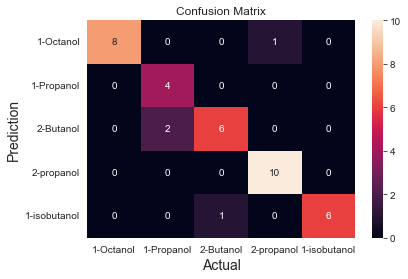

In [36]:
# The output below is probabilities of each instance
predictions_prob = model.predict(new_X_test)

# The output gives the class predictions
predictions = [np.argmax(prediction) for prediction in predictions_prob]

# Show confusion matrix
cm = confusion_matrix(Y_test, predictions)

sns.heatmap(cm, annot=True, fmt="g", xticklabels=labels_dict.values(), yticklabels=labels_dict.values())
plt.ylabel("Prediction", fontsize=14)
plt.xlabel("Actual", fontsize=14)
plt.title("Confusion Matrix")
plt.show()

In [37]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.67      1.00      0.80         4
           2       0.86      0.75      0.80         8
           3       0.91      1.00      0.95        10
           4       1.00      0.86      0.92         7

    accuracy                           0.89        38
   macro avg       0.89      0.90      0.88        38
weighted avg       0.91      0.89      0.90        38



### Conclusion

**The reason is the same as before**. In brief, we want a model that's **non-linear**. We know that ANN has **activation function** which gives our output to be non-linear.

Thanks for that, we get the same result which gives the best overall performance on our dataset. **ANN** give 100% accuracy, 100% precision, and 100% recall on test dataset**.

## Final Step

### Save our model

In [38]:
########## UNCOMMENT THIS TO SAVE THE MODEL ###########

# # Make folder "model"
# import os
# os.mkdir("model")

# # Not ANN Model
# import pickle

# scaler_file = "model/scaler.sav"
# enc_file = "model/enc.sav"
# model_file = "model/not-ann-model.sav"

# pickle.dump(scaler, open(scaler_file, 'wb'))
# pickle.dump(enc, open(enc_file, 'wb'))
# pickle.dump(rf, open(model_file, 'wb'))

# # ANN Model
# model_file = "model/ann-model.h5"
# model.save(model_file)

### Load the model

In [39]:
# # Not ANN Model
# scaler = pickle.load(open("model/scaler.sav", 'rb'))
# enc = pickle.load(open("model/enc.sav", 'rb'))
# model = pickle.load(open("model/not-ann-model.sav", 'rb'))

# # ANN Model
# ann_model = tf.keras.models.load_model("model/ann-model.h5")